# Assignment 1 - Discrete Visualization

You are hired as a data scientist at International Trade Administration Industry and Analysis National Travel and Tourism Office, a national bureau dedicating to enhancing tourism in the United States, and get involved in the **International Visitation and Spending in the United States** project. Towards the end of a fiscal year, you received a request from the headquarter to obtain insights based on the given tourist visitation number for different states in the U.S. Specifically, you are asked to produce a Jupyter notebook with visualizations that can interact with the 3-year US international visitation data and engage a meeting with various stakeholders, including the headquarter of national travel and tourism in a high-profile video conference.

## Question 0: Load Data (0% - But Required)

Complete the function `load_data` below to load and organize the dataset that we will use in subsequent questions.  You should return a pandas Datafile with 5 columns titled “state”, “visitation_2016”, “visitation_2017”, “visitation_2018”, and “visitation_2019”.  The first column should contain a state and the subsequent columns the number of visitors in each corresponding year.

The following instructions will help you do that correctly:

* First import the `US_States_Visited_2017.xlsx`, `US_States_Visited_2018.xlsx` and `US_States_Visited_2019.xlsx` datasets. The three datasets are located at the assets folder. You may start with `read_excel()` function in pandas and remove the top and bottom rows. In each file, some column should contain the state.  Subsequent columns include the number of visitors in two different years.   Note that some data is duplicated, and the year of the datafile indicates when the file was made available (so 2016 data is in the 2017 datafile).

* After that, pick out the relevant columns.  Note that you will need to multiply all the visitation numbers by 1,000. For example, in 2019, the recorded visitation for Alabama state was supposed to be 141,000 after multiplying 1,000. This must be applied for all 3 datasets.

* Finally, you should merge the 3 datasets together, and rename the merged dataset called `merged_US_states_visitation`. The merged dataset should retain only the census states called `state`, 2016 visitation data called `visitation_2016`, 2017 visitation data called `visitation_2017`, 2018 visitation data called `visitation_2018`and 2019 visitation data called `visitation_2019`. To avoid confusion, when we join the datasets, keep every states that ever has international visitation data. Finally, order the state names alphabetically. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

def load_data() -> pd.DataFrame:
    ''' This function should load the data as described in the assignment description
    '''
    df1 = pd.read_excel('assets/US_States_Visited_2017.xlsx', 'Sheet1', skiprows = 6, nrows=35, index_col = 0)
    df1.columns = ['STATE/TERRITORY VISITATION','2016 MARKET SHARE','2016 VISITATION 000','2017 MARKET SHARE','2017 VISITATION 000',
    'VOLUME % CHANGE']

    df2 = pd.read_excel('assets/US_States_Visited_2018.xlsx', 'Sheet1', skiprows = 7, nrows=39, index_col = 0)
    df2.columns = ['STATE/TERRITORY VISITATION','2018 MARKET SHARE','2018 VISITATION 000','VOLUME % CHANGE','2017 MARKET SHARE',\
                   '2017 VISITATION 000']

    df3 = pd.read_excel('assets/US_States_Visited_2019.xlsx', '2019 States', skiprows = 6, nrows=40, index_col = 0)
    df3.columns = ['STATE/TERRITORY VISITATION','2019 MARKET SHARE','2019 VISITATION 000','VOLUME % CHANGE','2018 MARKET SHARE',\
                   '2018 VISITATION 000']

    df1.drop(['2016 MARKET SHARE', '2017 MARKET SHARE', 'VOLUME % CHANGE'], axis=1, inplace = True)
    df2.drop(['2017 MARKET SHARE', '2018 MARKET SHARE', 'VOLUME % CHANGE'], axis=1, inplace = True)
    df3.drop(['2018 MARKET SHARE', '2019 MARKET SHARE', 'VOLUME % CHANGE'], axis=1, inplace = True)
    #     df1['2016 VISITATION 000'] = df1['2016 VISITATION 000'].astype(int)
    df1['STATE/TERRITORY VISITATION'] = df1['STATE/TERRITORY VISITATION'].astype(str).str.strip()
    df2['STATE/TERRITORY VISITATION'] = df2['STATE/TERRITORY VISITATION'].astype(str).str.strip()
    df3['STATE/TERRITORY VISITATION'] = df3['STATE/TERRITORY VISITATION'].astype(str).str.strip()

    dict1 = df1.set_index("STATE/TERRITORY VISITATION")["2016 VISITATION 000"].to_dict()
    dict2 = df2.set_index("STATE/TERRITORY VISITATION")["2017 VISITATION 000"].to_dict()
    dict3 = df1.set_index("STATE/TERRITORY VISITATION")["2017 VISITATION 000"].to_dict()
    dict4 = df2.set_index("STATE/TERRITORY VISITATION")["2018 VISITATION 000"].to_dict()
    df3['2016 VISITATION 000'] = df3['STATE/TERRITORY VISITATION'].map(dict1)
    df3['2017_1'] = df3['STATE/TERRITORY VISITATION'].map(dict3)
    df3['2017_2'] = df3['STATE/TERRITORY VISITATION'].map(dict2)
    df3['2018_1'] = df3['STATE/TERRITORY VISITATION'].map(dict4)
    df3 = df3[['STATE/TERRITORY VISITATION','2019 VISITATION 000','2016 VISITATION 000','2017_1','2018_1']]

    df3 = df3.rename(columns = {'2016 VISITATION 000': 'visitation_2016','2017_1': 'visitation_2017',\
                                                   '2018_1': 'visitation_2018','2019 VISITATION 000': 'visitation_2019',\
                               'STATE/TERRITORY VISITATION':'state'})

    df3["visitation_2016"]=1000*df3["visitation_2016"]
    df3["visitation_2017"]=1000*df3["visitation_2017"]
    df3["visitation_2018"]=1000*df3["visitation_2018"]
    df3["visitation_2019"]=1000*df3["visitation_2019"]
    #df3['visitation_2016'] = df3['visitation_2016'].astype(int)
    df3 = df3.sort_values(by=['state'])

    return df3

# Tests
# These tests do not ensure that your solution is correct, but are meant to help you find out where you might have gone wrong
df = load_data()
assert type(df)==pd.DataFrame, "Your return value must be a pandas DataFrame"
assert df.index.size == 40, "You should have 40 rows in your solution"
assert all(['visitation_' + str(year) in df.columns for year in [2016, 2017, 2018, 2019]]), "Some of your column name are incorrect"
try:
   assert df.iloc[0].name == 'Alabama', "We expected to see Alabama as the first entry but it was not"
except:
   assert df['state'].iloc[0] == 'Alabama', "We expected to see Alabama as the first entry but it was not"
try:
   assert df.loc['Iowa'].isnull().values.any() == True
except:
   assert df.iloc[12].isnull().values.any() == True
try:
   assert df.loc['Michigan'].isnull().values.any() == False
except:
   assert df.iloc[18].isnull().values.any() == False
assert round(df['visitation_2016'].mean(),1) == 1489649.3
assert round(df['visitation_2017'].mean(),1) == 1507142.9
assert round(df['visitation_2018'].mean(),1) == 1398576.5
assert round(df['visitation_2019'].mean(),1) == 1353375.0

In [6]:
df.head()

,state,visitation_2019,visitation_2016,visitation_2017,visitation_2018
Rank,,,,,
34,Alabama,141000,1.240000e+05,136000.0,155545.0
36,Alaska,109000,NaN,NaN,135603.0
10,Arizona,1196000,1.157751e+06,1035000.0,1168582.0
3,California,8050000,8.220783e+06,8178000.0,8531051.0
17,Colorado,509000,4.849022e+05,459000.0,550390.0


## Question 1: Bar Chart (60%)

Make use of the merged data to complete the function `make_bar_chart` below. The elements requested by the management team for the first visualization are:
* Make 4 plots, each of which is a bar chart representing the total visitation (as y-axis) of each state (shown in x-axis) in year 2016, 2017, 2018 and 2019. Each plot should use the data for each year.
* Make the figures readable by adjusting the figure size, and specify the year of each plot using the title (e.g., A proper title of the plot using 2016 visitation data could be something like “Visitation data 2016”.)
* For each plot, place two markers (style of your choice): one above the bar with the highest visitation and one above the bar with the lowest visitation.

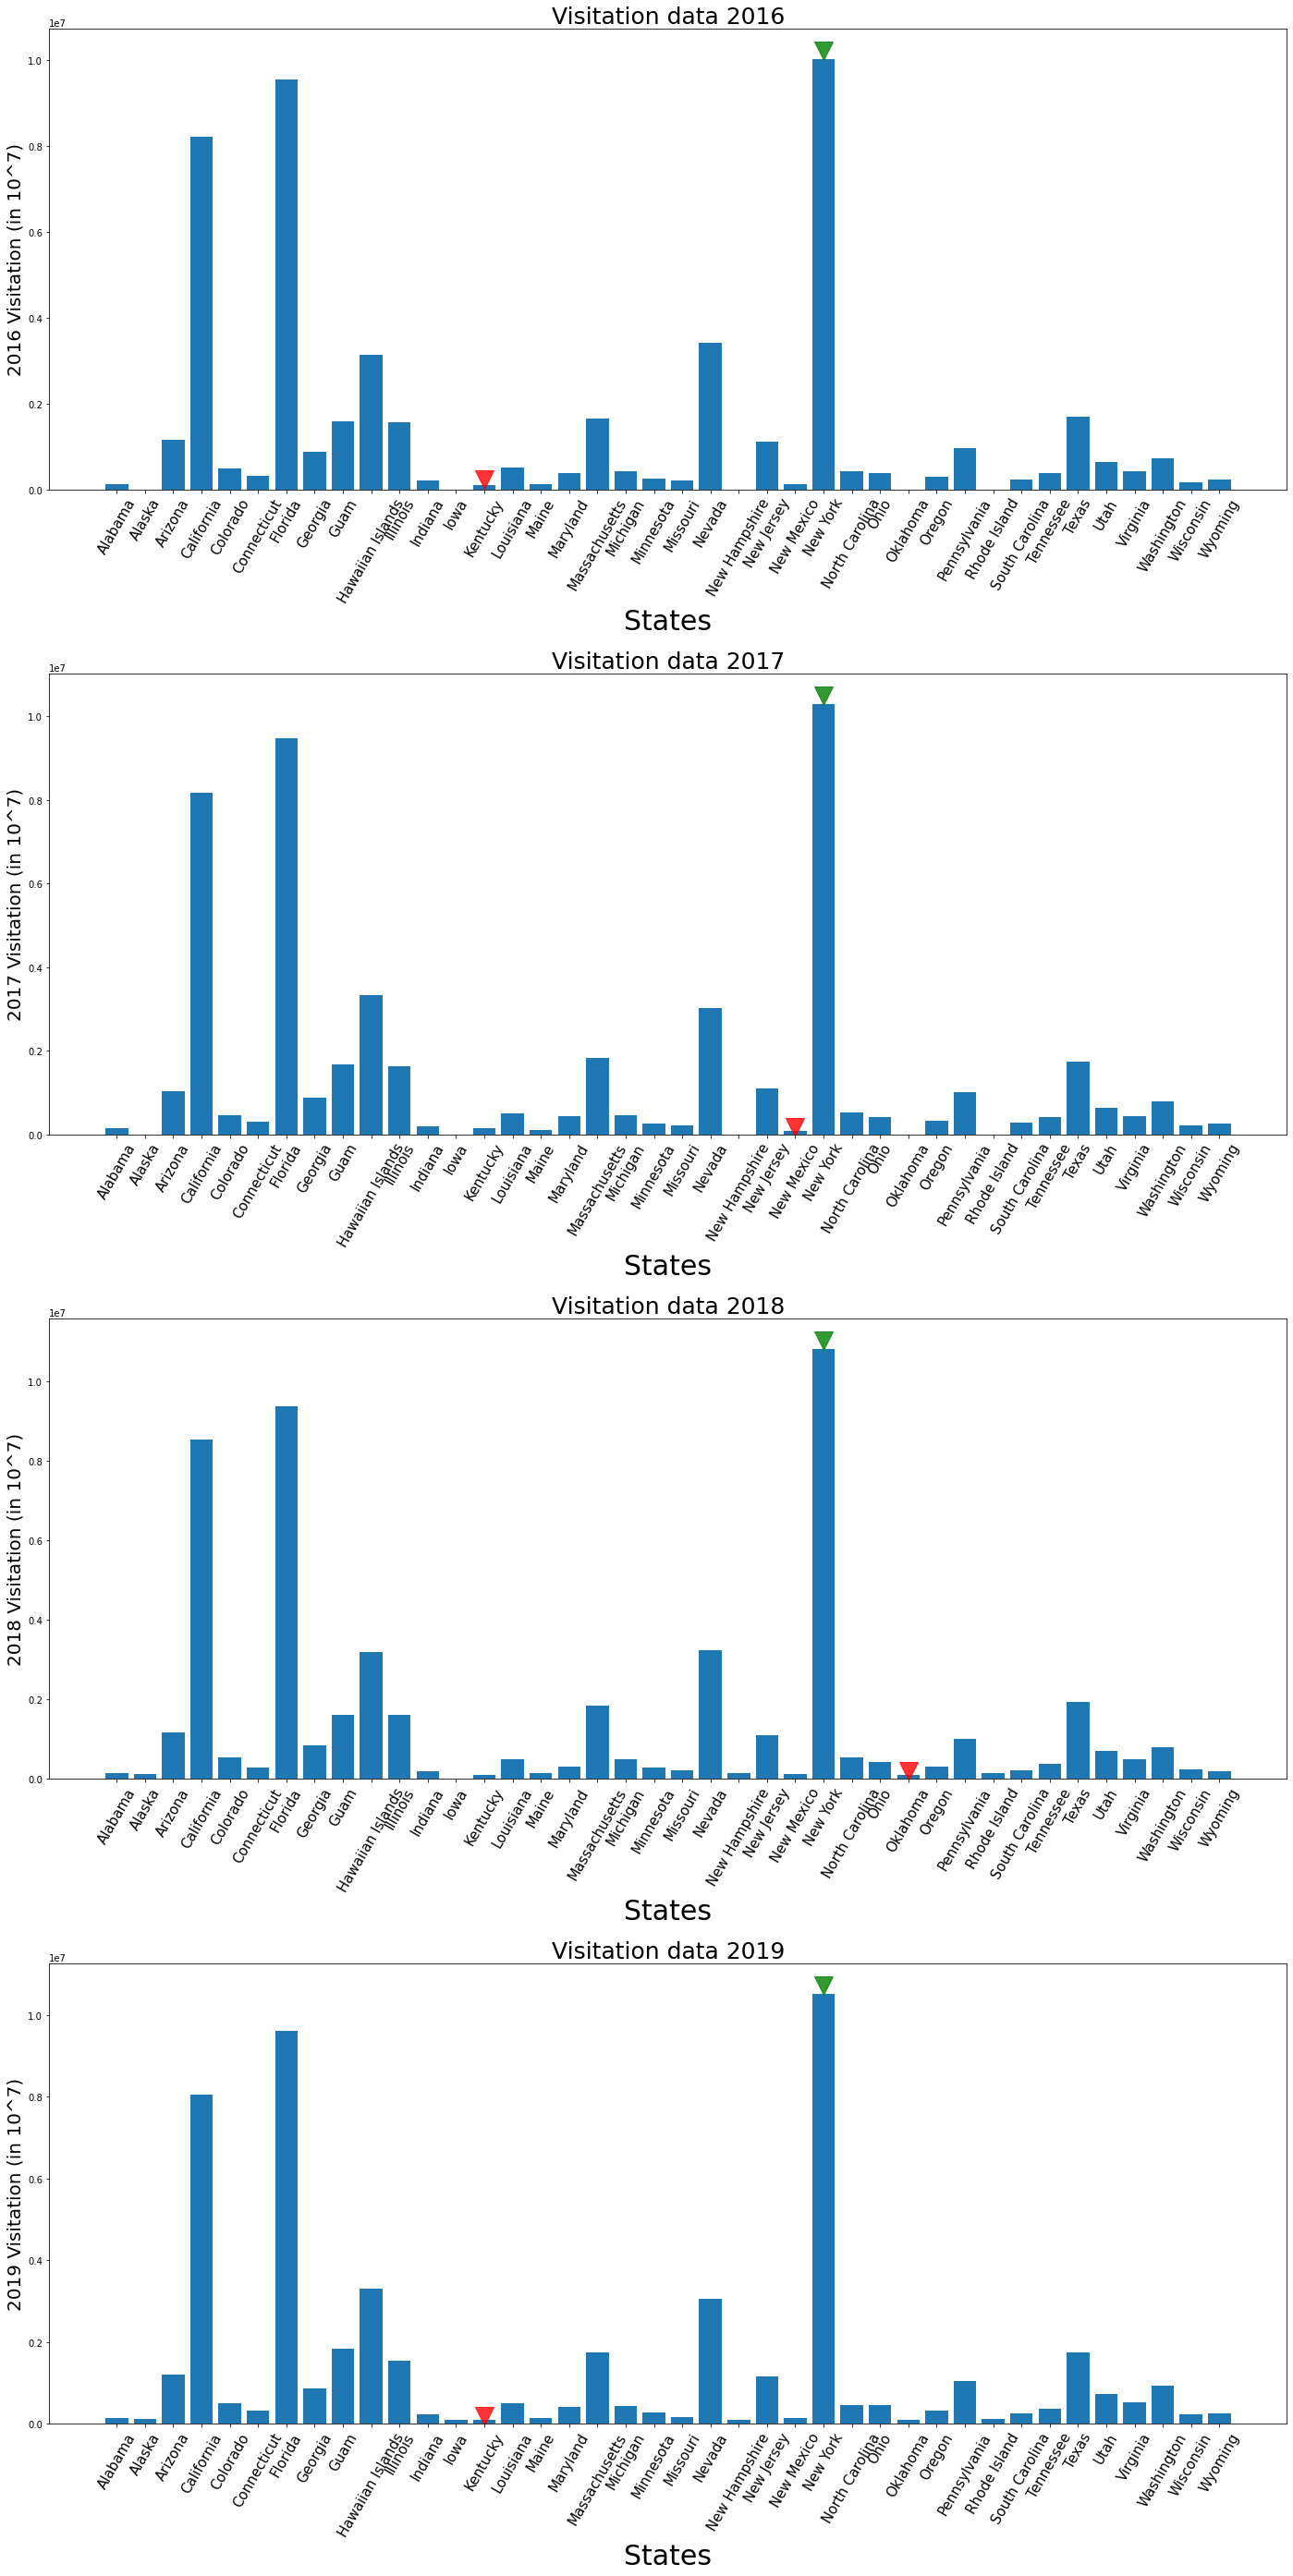

In [2]:
def make_bar_chart(data):
    from matplotlib import pyplot as plt   
    fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1,figsize=(5.5, 3.5),constrained_layout=True)
    fig.subplots_adjust(hspace=.4)


    ax1 = plt.subplot(4,1,1)

    plt.gcf().set_size_inches(24,200)
    field = 'visitation_2016'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in 10^7)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val + max_val*.02, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val + min_val*1, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)

    ###

    ax2 = plt.subplot(4,1,2)
    #plt.gcf().set_size_inches(25,220)
    field = 'visitation_2017'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in 10^7)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val + max_val*.02, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val + min_val*1, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)

    ####

    ax3 = plt.subplot(4,1,3)
    #plt.gcf().set_size_inches(25,220)
    field = 'visitation_2018'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in 10^7)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val + max_val*.02, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val + min_val*1, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)

    ####
    ax4 = plt.subplot(4,1,4)
    #plt.gcf().set_size_inches(25,220)
    field = 'visitation_2019'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in 10^7)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val + max_val*.02, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val + min_val*1, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)
    #fig.tight_layout(rect=[-4, .6,  .4,  .6], w_pad = 1000)


    # plt.subplots_adjust(left=0.1,
    #                     bottom=0.1, 
    #                     right=0.9, 
    #                     top=0.9, 
    #                     wspace=0.4, 
    #                     hspace=0.4)

    plt.show()
    return plt.show()

make_bar_chart(load_data())

## Question 2: Transformation (40%)
After a week, the management team returned the report back to you can say "Hey! The visualization looks highly skewed. We could hardly see what is happening in the last few states." 

To better visualize the visitation data to the stakeholders, your manager told you a new requirement: perform **an appropriate transformation** on the visitation number to make the differences more clear and:

* Build the bar chart again with all visitation number log-transformed (38%)
* You will notice that it’s tougher to now note which one is the highest/ lowest. Use markers/ sorting to clearly indicate the same. You can do this either in a new cell or within the visualization in this cell(2%)

Be sure to clearly indicate that this is a visualization of a transformed data.
Why did you choose this transformation?
Note: If you choose log transformation, make sure that the base is 10.

Note: You may transform the data, or transform the chart representation of the data. Both are possible, it's up to you.

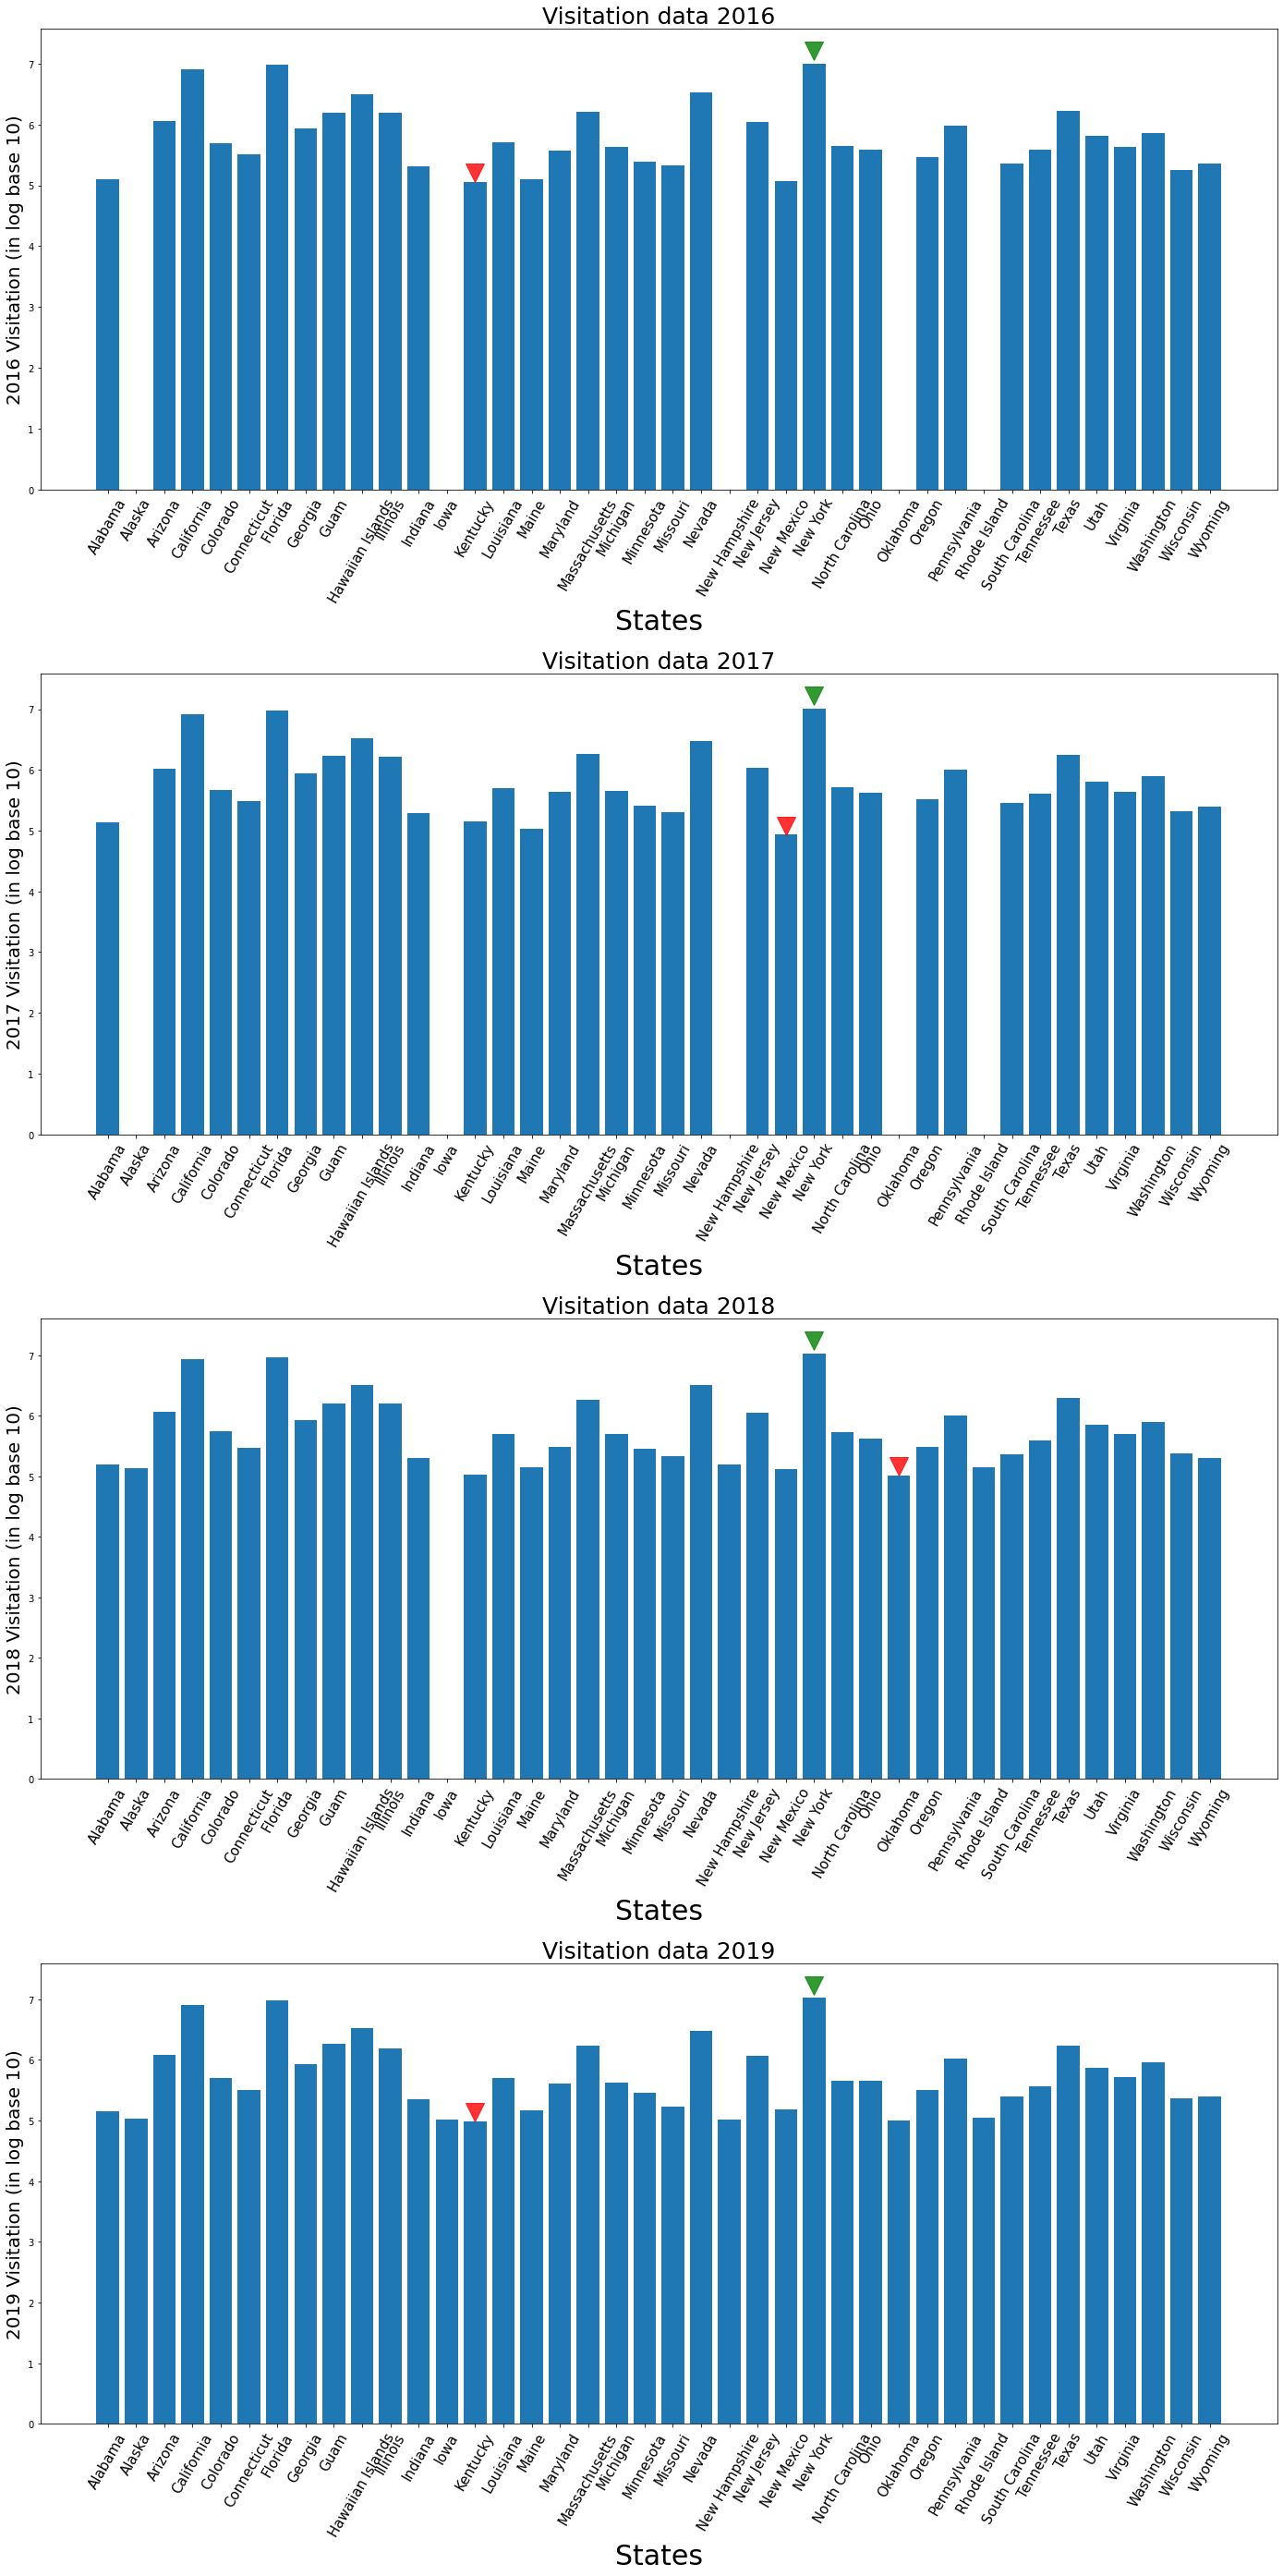

In [3]:
def make_transformed_bar_chart(data):

    data['visitation_2016'] = np.log10(data['visitation_2016'])
    data['visitation_2017'] = np.log10(data['visitation_2017'])
    data['visitation_2018'] = np.log10(data['visitation_2018'])
    data['visitation_2019'] = np.log10(data['visitation_2019'])

    from matplotlib import pyplot as plt   
    fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1,figsize=(5.5, 3.5),constrained_layout=True)
    fig.subplots_adjust(hspace=.4)


    ax1 = plt.subplot(4,1,1)

    plt.gcf().set_size_inches(24,200)
    field = 'visitation_2016'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in log base 10)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val*1.03, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val*1.03, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)

    ###

    ax2 = plt.subplot(4,1,2)
    #plt.gcf().set_size_inches(25,220)
    field = 'visitation_2017'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in log base 10)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val*1.03, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val*1.03, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)

    ####

    ax3 = plt.subplot(4,1,3)
    #plt.gcf().set_size_inches(25,220)
    field = 'visitation_2018'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in log base 10)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val*1.03, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val*1.03, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)

    ####
    ax4 = plt.subplot(4,1,4)
    #plt.gcf().set_size_inches(25,220)
    field = 'visitation_2019'

    plt.bar(data['state'], data[field])
    plt.xticks(rotation = 60)
    plt.tick_params(axis='x', labelsize=15)
    fig.subplots_adjust(bottom=.7)

    plt.title(f"Visitation data {field[-4:]}", fontdict={'fontsize': 25})
    plt.xlabel("States")
    plt.ylabel(f"{field[-4:]} Visitation (in log base 10)")

    axes = plt.gca()

    axes.xaxis.label.set_size(30)
    axes.yaxis.label.set_size(20)

    max_state = data[data[field] == data[field].max()]['state'].iloc[0]
    min_state = data[data[field] == data[field].min()]['state'].iloc[0]
    max_val = data[field].max()
    min_val = data[field].min()

    plt.plot(max_state, max_val*1.03, marker="v", linestyle="--", alpha=0.8, color="g",markersize=20)
    plt.plot(min_state, min_val*1.03, marker="v", linestyle="--", alpha=0.8, color="r",markersize=20)
    #fig.tight_layout(rect=[-4, .6,  .4,  .6], w_pad = 1000)


    # plt.subplots_adjust(left=0.1,
    #                     bottom=0.1, 
    #                     right=0.9, 
    #                     top=0.9, 
    #                     wspace=0.4, 
    #                     hspace=0.4)

    plt.show()
    return plt.show()

make_transformed_bar_chart(load_data())